# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

https://archive.ics.uci.edu/ml/datasets/Covertype

Forest CoverType dataset (cobertura florestal a partir de variáveis ​​cartográficas). Dados do Sistema de Informações sobre Recursos (RIS) da Região 2 do Serviço Florestal dos EUA (USFS).

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [2]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG, Image
from IPython.display import display
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

pd.__version__

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Montando o dataset
data_set = "/content/drive/My Drive/04 - UNI-BH/POS/PROJETO_2/covtype.data" # data set completo

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Rotulando as features, ja que o dataset nao possuia rotulos identificados no proprio arquivo. Sera que é correto fazer assim?
# Name / Data Type / Measurement / Description
features = ["Elevation",# quantitative /meters / Elevation in meters
            "Aspect", # quantitative / azimuth / Aspect in degrees azimuth
            "Slope", # quantitative / degrees / Slope in degrees
            "Horizontal_Distance_To_Hydrology", # quantitative / meters / Horz Dist to nearest surface water features
            "Vertical_Distance_To_Hydrology", # quantitative / meters / Vert Dist to nearest surface water features
            "Horizontal_Distance_To_Roadways", # quantitative / meters / Horz Dist to nearest roadway
            "Hillshade_9am", # quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
            "Hillshade_Noon", # quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
            "Hillshade_3pm", # quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
            "Horizontal_Distance_To_Fire_Points", # quantitative / meters / Horz Dist to nearest wildfire ignition points
            "Wilderness_Area_01", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Wilderness_Area_02", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Wilderness_Area_03", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designatioN
            "Wilderness_Area_04", # (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
            "Soil_Type_01", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_02", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_03", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_04", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_05", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_06", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_07", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_08", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_09", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_10", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_11", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_12", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_13", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_14", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_15", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_16", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_17", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_18", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_19", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_20", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_21", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_22", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_23", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_24", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_25", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_26", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_27", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_28", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_29", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_30", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_31", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_32", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_33", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_34", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_35", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_36", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_37", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_38", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_39", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
            "Soil_Type_40", #  (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation            
            "Cover_Type" # (7 types) / integer / 1 to 7 / Forest Cover Type designation 
            ]
# Cover_Type => Este é nosso alvo que iremos classificar em funcao das demais feaures a partir do treino.

In [0]:
# Carregando o dataset
df = pd.read_csv(data_set
    ,names=features
    ,sep=r','
    #,decimal=','
    ,header=1 
    #,encoding='utf8' # considera acentuacao
    ,engine='python')
    #,na_values="?").dropna() # apaga tuplas com pelo menos uma feature fazia

In [5]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_01                    int64
Wilderness_Area_02                    int64
Wilderness_Area_03                    int64
Wilderness_Area_04                    int64
Soil_Type_01                          int64
Soil_Type_02                          int64
Soil_Type_03                          int64
Soil_Type_04                          int64
Soil_Type_05                          int64
Soil_Type_06                          int64
Soil_Type_07                          int64
Soil_Type_08                          int64
Soil_Type_09                    

In [6]:
# Como estao os dados?
df.head(-5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_01,Wilderness_Area_02,Wilderness_Area_03,Wilderness_Area_04,Soil_Type_01,Soil_Type_02,Soil_Type_03,Soil_Type_04,Soil_Type_05,Soil_Type_06,Soil_Type_07,Soil_Type_08,Soil_Type_09,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581000,2419,168,25,108,33,124,230,240,126,812,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581001,2415,161,25,95,29,120,236,237,116,815,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581002,2410,158,24,90,24,120,238,236,115,819,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581003,2405,159,22,90,19,120,237,238,119,824,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


Os dados categóricos ja estao binarizados no dataset, que são as feaures "Wilderness_Area" com 4 categorias e "Soil_type" com 40.

In [7]:
# vamos ver o tamanho do dataset
df.shape

(581010, 55)

In [8]:
# vamos ver se possui valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581010 entries, 0 to 581009
Data columns (total 55 columns):
Elevation                             581010 non-null int64
Aspect                                581010 non-null int64
Slope                                 581010 non-null int64
Horizontal_Distance_To_Hydrology      581010 non-null int64
Vertical_Distance_To_Hydrology        581010 non-null int64
Horizontal_Distance_To_Roadways       581010 non-null int64
Hillshade_9am                         581010 non-null int64
Hillshade_Noon                        581010 non-null int64
Hillshade_3pm                         581010 non-null int64
Horizontal_Distance_To_Fire_Points    581010 non-null int64
Wilderness_Area_01                    581010 non-null int64
Wilderness_Area_02                    581010 non-null int64
Wilderness_Area_03                    581010 non-null int64
Wilderness_Area_04                    581010 non-null int64
Soil_Type_01                          581010 non-

In [9]:
# Conferindo se realmente nao ha nulos
round(df.isnull().mean()*100,2)

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area_01                    0.0
Wilderness_Area_02                    0.0
Wilderness_Area_03                    0.0
Wilderness_Area_04                    0.0
Soil_Type_01                          0.0
Soil_Type_02                          0.0
Soil_Type_03                          0.0
Soil_Type_04                          0.0
Soil_Type_05                          0.0
Soil_Type_06                          0.0
Soil_Type_07                          0.0
Soil_Type_08                          0.0
Soil_Type_09                          0.0
Soil_Type_10                      

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


(1, 1466.8601177336277)

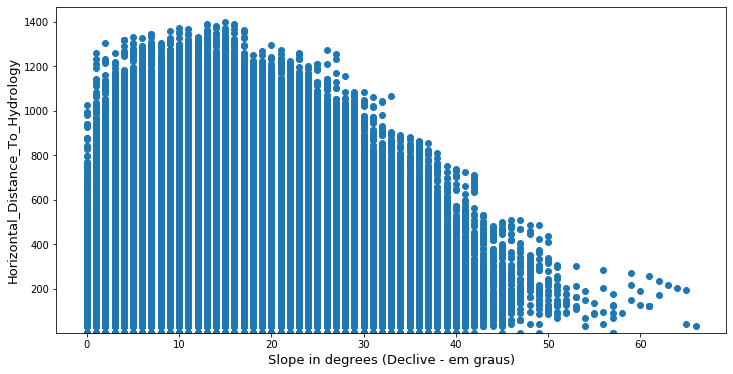

In [11]:
# explorando uma rapida visualizacao do declive (slope) em funcao da cobertura
plt.figure(figsize=(12,6))
#plt.scatter(x=df.Slope, y=df.Cover_Type)
plt.scatter(x=df.Slope, y=df.Horizontal_Distance_To_Hydrology)
plt.xlabel("Slope in degrees (Declive - em graus)", fontsize=13)
plt.ylabel("Horizontal_Distance_To_Hydrology", fontsize=13)
plt.ylim(1)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

**Gaussian Naive Bayes**

Os métodos Naive Bayes são um conjunto de algoritmos de aprendizado supervisionado com base na aplicação do teorema de Bayes com a suposição "ingênua" de independência condicional entre cada par de recursos, dado o valor da variável de classe.


#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [13]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
import sklearn
from sklearn.model_selection import train_test_split

# Organizando nossos dados para fazer o split
label_names = np.array(features[54]) # label alvo da feature: 54 = Cover_Type
labels = np.array(df[label_names]) # conteudo do label alvo: Cover_Type

feature_names = np.array(features[0:54]) # sao as features, sem o alvo
feature_data = np.array(df[feature_names]) # conteudo das demais features

# vamos dar uma olhada no dados das demais features:
#feature_names
print(labels)
print(feature_data)

[2 2 5 ... 3 3 3]
[[2804  139    9 ...    0    0    0]
 [2785  155   18 ...    0    0    0]
 [2595   45    2 ...    0    0    0]
 ...
 [2386  159   17 ...    0    0    0]
 [2384  170   15 ...    0    0    0]
 [2383  165   13 ...    0    0    0]]


In [14]:
# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70% de treino e o restante de teste
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo de feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
# O par de treinos são os 70% das classes e o alvo
print("Par de treino:\n", train, '\n', train_labels, '\n')

# O par de testes sãos os 30% das classes e o alvo
print("Par de testes:\n", test, '\n', test_labels)

Par de treino:
 [[3159   49   14 ...    0    0    0]
 [2955  145   14 ...    0    0    0]
 [2853   73   28 ...    0    0    0]
 ...
 [3175  292   18 ...    0    0    0]
 [3070    2   15 ...    0    0    0]
 [3008    9   15 ...    0    0    0]] 
 [1 2 1 ... 2 2 1] 

Par de testes:
 [[2559  319   13 ...    0    0    0]
 [2507  171    8 ...    0    0    0]
 [2929  275   16 ...    0    0    0]
 ...
 [2235  291   12 ...    0    0    0]
 [3024  290   12 ...    0    0    0]
 [2878  213   26 ...    0    0    0]] 
 [2 3 2 ... 3 2 2]


In [28]:
#importar o modulo GaussianNB: algoritmo simples que geralmente funciona bem em tarefas de classificação binaria
from sklearn.naive_bayes import GaussianNB

# Inicializando nosso classificador Gaussiano, sem parâmetros (default)
clf_gnb = GaussianNB()

# Treinando nosso classificador (fazendo o fit) a atribuindo ao modelo 01
modelo_01 = clf_gnb.fit(train, train_labels, ) # par de dados de treino e o resultado alvo do treino
modelo_01.get_params

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=1e-09)>

In [29]:
# Fazendo as previsões para o modelo 
previsao_01 = clf_gnb.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_01 # resultado da previsao

array([3, 3, 1, ..., 3, 1, 5])

In [30]:
# valor medio e padrao do train
print("Mean value of train: {} Std value of train: {}". format(train_labels.mean(), train_labels.std()))

Mean value of train: 2.050744147506682 Std value of train: 1.3950799762098163


In [31]:
# valor medio e padrao do test
print("Mean value of test: {} Std value test: {}". format(test_labels.mean(), test_labels.std()))

Mean value of test: 2.0531316156348427 Std value test: 1.3997890790201815


In [33]:
# Vamos ver o score
from sklearn.metrics import mean_squared_error
# Perda de regressão ao erro quadrático médio
train_score = mean_squared_error(clf_gnb.predict(train), train_labels)
test_score = mean_squared_error(clf_gnb.predict(test), test_labels)
#
print("Train MSE modelo_02: {} Test MSE modelo_02: {}".format(train_score, test_score)) 

Train MSE modelo_02: 3.759087008583575 Test MSE modelo_02: 3.7447261378174788


In [34]:
# Avaliando a precisao do modelo (acurácia)
from sklearn.metrics import accuracy_score

# Avaliar a precisão
print('Percentual de precisao do modelo baseline 01: %f' %(accuracy_score(test_labels, previsao_01)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 01: 45.940116 %

    Caramba, apenas 46% de acerto. Muito baixo! Como posso melhorar isso?

    Por que os valores da média e padrao do treino e teste estao bem proximos, porém a acurária é baixa? Qual a relação?

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [54]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

# Organizando nossos dados para fazer o split
label_names = np.array(features[54]) # label alvo da feature: 54 = Cover_Type
labels = np.array(df[label_names]) # conteudo do label alvo: Cover_Type

feature_names = np.array(features[0:10]) # sao as features, sem o alvo, reduzindo a dimensionalidade
feature_data = np.array(df[feature_names]) # conteudo das demais features

# vamos dar uma olhada no dados das demais features:
#feature_names
print(labels)
print(feature_data)

# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70% de treino e o restante de teste
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo de feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
# O par de treinos são os 70% das classes e o alvo
print("Par de treino:\n", train, '\n', train_labels, '\n')

# O par de testes sãos os 30% das classes e o alvo
print("Par de testes:\n", test, '\n', test_labels)

# Inicializando nosso classificador Gaussiano, sem parâmetros (default)
clf_gnb_otm = GaussianNB()

# Treinando nosso classificador (fazendo o fit) a atribuindo ao modelo 01
modelo_01_otm = clf_gnb_otm.fit(train, train_labels, ) # par de dados de treino e o resultado alvo do treino
modelo_01_otm.get_params

# Fazendo as previsões para o modelo 
previsao_01_otm = clf_gnb_otm.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_01_otm # resultado da previsao

# Avaliar a precisão
print('\n Percentual de precisao do modelo baseline 01: %f' %(accuracy_score(test_labels, previsao_01_otm)*100), end=' %')  # agora comparando 

[2 2 5 ... 3 3 3]
[[2804  139    9 ...  238  135 6121]
 [2785  155   18 ...  238  122 6211]
 [2595   45    2 ...  234  150 6172]
 ...
 [2386  159   17 ...  241  130  854]
 [2384  170   15 ...  245  143  864]
 [2383  165   13 ...  244  141  875]]
Par de treino:
 [[3159   49   14 ...  209  115 4322]
 [2955  145   14 ...  237  125 1106]
 [2853   73   28 ...  174   47 1008]
 ...
 [3175  292   18 ...  234  206 2022]
 [3070    2   15 ...  209  148  661]
 [3008    9   15 ...  209  142 2437]] 
 [1 2 1 ... 2 2 1] 

Par de testes:
 [[2559  319   13 ...  227  181  837]
 [2507  171    8 ...  244  151 1047]
 [2929  275   16 ...  242  205 5001]
 ...
 [2235  291   12 ...  238  191  518]
 [3024  290   12 ...  238  193 1273]
 [2878  213   26 ...  253  190 1318]] 
 [2 3 2 ... 3 2 2]

 Percentual de precisao do modelo baseline 01: 63.101037 %

    Retirando as features binarizadas (Wilderness_Area and Soil_Type), conseguimos um aumento de 17%, passando de uma acurária de 46 para 63%. Um aumento considerável, mas ainda talvez longe do ideal.

    Será que estas features são tão irrelevantes para o modelo assim?

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [59]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

# Agora vamos tentar fazer um tunnig no classificador, reduzindo a dimensionalidade a alterando os parâmetros no momento de instanciar o objeto.
# Organizando nossos dados para fazer o split
label_names = np.array(features[54]) # label alvo da feature: 54 = Cover_Type
labels = np.array(df[label_names]) # conteudo do label alvo: Cover_Type

feature_names = np.array(features[0:10]) # sao as features, sem o alvo, reduzindo a dimensionalidade
feature_data = np.array(df[feature_names]) # conteudo das demais features

# vamos dar uma olhada no dados das demais features:
#feature_names
print(labels)
print(feature_data)

# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70% de treino e o restante de teste
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo de feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
# O par de treinos são os 70% das classes e o alvo
#print("Par de treino:\n", train, '\n', train_labels, '\n')

# O par de testes sãos os 30% das classes e o alvo
#print("Par de testes:\n", test, '\n', test_labels)

# Inicializando nosso classificador Gaussiano, sem parâmetros (default)
clf_gnb_otm_tun = GaussianNB(var_smoothing=1e-2)

# Treinando nosso classificador (fazendo o fit) a atribuindo ao modelo 01
modelo_01_otm_tun = clf_gnb_otm_tun.fit(train, train_labels, ) # par de dados de treino e o resultado alvo do treino
print(modelo_01_otm_tun.get_params)

# Fazendo as previsões para o modelo 
previsao_01_otm_tun = clf_gnb_otm_tun.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
#print(previsao_01_otm_tun) # resultado da previsao

# Avaliar a precisão
print('Percentual de precisao do modelo baseline 01: %f' %(accuracy_score(test_labels, previsao_01_otm_tun)*100), end=' %')  # agora comparando 

[2 2 5 ... 3 3 3]
[[2804  139    9 ...  238  135 6121]
 [2785  155   18 ...  238  122 6211]
 [2595   45    2 ...  234  150 6172]
 ...
 [2386  159   17 ...  241  130  854]
 [2384  170   15 ...  245  143  864]
 [2383  165   13 ...  244  141  875]]
<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=0.01)>
Percentual de precisao do modelo baseline 01: 64.662111 %

    Com o parâmetro clf_gnb_otm_tun = GaussianNB(var_smoothing=1e-2), Portion of the largest variance of all features that is added to variances for calculation stability, consegui um acurácia de 64,66%. É a maior para este modelo.

#### 3.5) Qual método escolhido?

**Decision Trees**

Só para lembrar mesmo, o que é uma decision tree:
As árvores de decisão (TD) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que prediga o valor de uma variável de destino, aprendendo regras simples de decisão inferidas a partir dos recursos de dados.

Por exemplo, no exemplo abaixo, as árvores de decisão aprendem com os dados a aproximação de uma curva senoidal com um conjunto de regras de decisão if-then-else. Quanto mais profunda a árvore, mais complexas são as regras de decisão e mais adequado o modelo.

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [60]:
# Implementação. Use mais blocos se achar que ficará mais organizado.
# Dividir nossos dados em treino e teste. Para o baseline estou utilizando 70 de treino.
train, test, train_labels, test_labels = train_test_split(feature_data, # valores de treino
                                                          labels,  # valores alvo do treino feature_data
                                                          train_size=0.70,
                                                          random_state=42) 
train_labels

array([1, 2, 1, ..., 2, 2, 1])

In [61]:
#importar o modulo DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# criando o classificador com a decision tree regressor, sem cross validation, parametros default
clf_dtr = DecisionTreeRegressor(max_features=None)

# Treinando nosso classificador (fazendo o fit)
modelo_02 = clf_dtr.fit(train, train_labels) # par de dados de treino e o resultado alvo do treino
modelo_02

# Fazendo as previsoes
previsao_02 = clf_dtr.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_02

# Avaliando a precisão
print('Percentual de precisao do modelo baseline 02: %f' %(accuracy_score(test_labels, previsao_02)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 02: 91.241688 %

In [62]:
# Vamos ver o score
from sklearn.metrics import mean_squared_error
# Perda de regressão ao erro quadrático médio
train_score = mean_squared_error(clf_dtr.predict(train), train_labels)
test_score = mean_squared_error(clf_dtr.predict(test), test_labels)
#
print("Train MSE modelo_02: {} Test MSE modelo_02: {}".format(train_score, test_score)) 

Train MSE modelo_02: 0.0 Test MSE modelo_02: 0.4535091191775242


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0173777 to fit


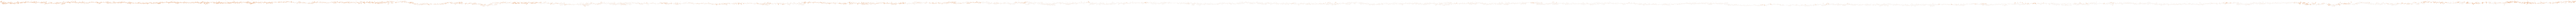

In [63]:
# vamos plotar a arvore de decisao
graph = Source(tree.export_graphviz(clf_dtr, out_file=None, feature_names=feature_names, filled = True))
display(Image(graph.pipe(format='png')))

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [64]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

# criando o classificador com a decision tree regressor e com cross-validation
param_grid={
        'min_samples_split': range(2, 100, 5),
        'max_depth' : range(1, 20),
        'min_samples_leaf' : range(5,20),
        'min_impurity_decrease' : np.arange(0,1, 0.01),
        }

clf_dtr_cv = DecisionTreeRegressor()
clf_dtr_cv = RandomizedSearchCV(clf_dtr_cv, param_grid, iid=True, n_iter=1000, scoring='neg_mean_squared_error', random_state=42, refit=True)

# Treinando nosso classificador (fazendo o fit) otimizado
modelo_02_otm = clf_dtr_cv.fit(train, train_labels) # par de dados de treino e o resultado alvo do treino
modelo_02_otm

train_score = clf_dtr_cv.best_score_
test_score = mean_squared_error(clf_dtr_cv.predict(test), test_labels)

print("Best params: {}".format(clf_dtr_cv.best_params_))
print("Train MSE modelo_02 otimizado: {} Test MSE modelo_02 otiizado: {}".format(train_score, test_score))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best params: {'min_samples_split': 37, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.0, 'max_depth': 17}
Train MSE modelo_02 otimizado: -0.5956244491884104 Test MSE modelo_02 otiizado: 0.5771624829101247


In [0]:
#vamos ver se consegue plotar a arvore:
graph = Source(tree.export_graphviz(clf_cv.best_estimator_, out_file=None, feature_names=X.columns, filled = True))
display(Image(graph.pipe(format='png')))

In [82]:
# Fazendo as previsoes após otimizacao
previsao_02_otm = clf_dtr_cv.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_02_otm = previsao_02_otm.round(decimals=0) # precisei arredondar !!! 
previsao_02_otm

# Avaliando a precisão
print('Percentual de precisao do modelo baseline 02 otimizado: %f' %(accuracy_score(test_labels, previsao_02_otm)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 02 otimizado: 78.477135 %

    Na tentativa de otimizar o baseline, infelizmente a acurácia diminuiu para 78,5%

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [101]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#tentativa de otimizacao
clf_dtr_cv_otm = DecisionTreeRegressor(
    criterion='mse'
    , splitter='best' #randon
    , max_depth=None
    , min_samples_split=2
    , min_samples_leaf=1
    , min_weight_fraction_leaf=0.0
    , max_features='auto'  #{“auto”, “sqrt”, “log2”}
    , random_state=42
    , max_leaf_nodes=None
    , min_impurity_decrease=0.0
    , min_impurity_split=None
    , presort='deprecated'
    , ccp_alpha=0.0) #non-negative float, default=0.0 Cost-Complexity Pruning

# Treinando nosso classificador (fazendo o fit) otimizado
modelo_02_cv_otm = clf_dtr_cv_otm.fit(train, train_labels) # par de dados de treino e o resultado alvo do treino
modelo_02_cv_otm
#
previsao_02_cv_otm = clf_dtr_cv_otm.predict(test) # retorna um array de previsoes para cada instancia do conjunto de dados de teste
previsao_02_cv_otm

# Avaliando a precisão
print('Percentual de precisao do modelo baseline 02 otimizado: %f' %(accuracy_score(test_labels, previsao_02_cv_otm)*100), end=' %')  # agora comparando o array de teste 
# com a previsao para ver se dá match e calculando a acuracia !!!

Percentual de precisao do modelo baseline 02 otimizado: 91.315124 %

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Os dados do dataset foram coletados de um sistema GIS e/ou cartográficos, não apresentado nulos no dataset e a feature do tipo de solo que é categorico já tinha sido binarizada. 

Utilizei dois algoritmos para a classificação do tipo de cobertura vegetal (Cover_Type), o nosso *target*, sendo:

  **Gaussian Naive Bayes** 

  **Decision Tree Regressor**

    Resultados do baseline:

Fazendo o fit nos classificadores com os mesmos parâmetros de treino (70% da base) considerando o baseline, o primeiro algoritmo apresentou uma acurária de apenas 46% e o segundo de 93%, ou seja, 47% melhor em relação o primeiro modelo !!!

Ainda preciso entender porque o segundo modelo apresentou a melhor acurácia! Quando saber qual o melhor algoritmo a utilizar de acordo com a base de dados?

    Resultados após otimizacao:
  
As tentativas de otimização para melhorar a acurária do modelo, no primeiro algoritmo (Gaussian Naive Bayes) conseguimos passar de 46% para 64,66% alterando o parâmetro default ao instanciar o classificador de clf_gnb_otm_tun = GaussianNB(var_smoothing=1e-9) [default] para clf_gnb_otm_tun = GaussianNB(var_smoothing=1e-2).

Já no no segundo algoritmo (Decision Tree Regression) a otimização reduziu a acurácia com a utilização do cross-validation e os parâmetros abaixo:

param_grid={
        'min_samples_split': range(2, 100, 5),
        'max_depth' : range(1, 20),
        'min_samples_leaf' : range(5,20),
        'min_impurity_decrease' : np.arange(0,1, 0.01),
        }

clf_dtr_cv = DecisionTreeRegressor()
clf_dtr_cv = RandomizedSearchCV(clf_dtr_cv, param_grid, iid=True, n_iter=1000, scoring='neg_mean_squared_error', random_state=42, refit=True).

Os algoritmos possuiem vários parâmetros para que o cientista de de dados consiga ajustar a rota e simular o melhor mais adequado ao problema proposto. A aplicação desses algoritmos em dataset´s reais e a prática da simulação tendem a levar a melhor modelos.


